# <font color="darkblue"> Prática 02: Algoritmo k-NN </font>

**Introdução:**


*   O algoritmo k-Nearest Neighbors (k-NN) é um método de classificação simples e eficaz utilizado em aprendizado de máquina. Ele se baseia na ideia de que objetos semelhantes estão próximos uns dos outros no espaço de características. O k-NN classifica novos exemplos comparando-os com os exemplos de treinamento mais próximos, de acordo com a medida de distância escolhida, como a distância Euclidiana.



**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.
*   Apresentar as funções do Scikit-Learn que lidam com o k-NN.



**Descrição:**

Implemente duas versões de um classificador que usa o algoritmo k-NN para identificar dígitos escritos à mão a partir de um conjunto de imagens e compare os tempoa de execução. Na primeira versão, você deverá implementar o algoritmo k-NN conforme visto em sala de aula. Na segunda, você deverá usar a algoritmo k-NN da biblioteca Scikit-Learn. O conjunto de imagens a ser utilizado consiste no dataset <i> Digits </i> da biblioteca Scikit-Learn.

# <font color="darkblue"> Solução </font>

### Descrição do Dataset

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Exploração do Dataset

In [2]:
print(digits.target[12])
print(digits.data.shape)
print(type(digits.data))
print(digits.images[10])

2
(1797, 64)
<class 'numpy.ndarray'>
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


### Exibição das imagens

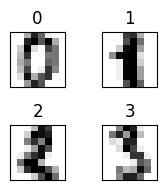

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(2, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

# usado para um numero nao ficar em cima do outro
plt.tight_layout()

### Implementação da Versão 1 do classificador
Divida os dados em dois conjuntos, de treino e teste, implemente o Algoritmo k-NN conforme discutido em sala de aula e exiba a acurácia da classificação e o tempo de execução.

In [19]:
#Embaralhar para evitar padrões indesejados e equilibrar o conjunto de treino e teste
import numpy as np

np.random.seed(42)  # Para reprodutibilidade
indices = np.random.permutation(len(digits.data))

##Divisão em dois conjuntos de treino e test
Optei por dividir 80% do dataset para treino e 20% para teste, pois dado o tamanho do dataset, 80%/20% é uma boa escolha porque ainda deixa uma quantidade razoável de dados para teste e maximiza o conjunto de treino, permitindo que o modelo aprenda melhor, enquanto ainda terá dados suficientes para uma avaliação confiável.


In [20]:
split_point = int(len(digits.data) * 0.8)

X_train = digits.data[indices[:split_point]]
y_train = digits.target[indices[:split_point]]

X_test = digits.data[indices[split_point:]]
y_test = digits.target[indices[split_point:]]

##Cálculo de distâncias
Implementação do cálculo das distâncias entre um ponto de teste e todos os pontos de treino.

In [21]:
import time

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def calculate_distances(X_train, x_test):
    distances = []
    for x_train in X_train:
        distances.append(euclidean_distance(x_train, x_test))
    return np.array(distances)

##Seleciona os k Vizinhos mais Próximos com base nas distâncias calculadas


In [22]:
def get_k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = calculate_distances(X_train, x_test)
    k_indices = np.argsort(distances)[:k]
    return y_train[k_indices]

##Classificação com Base nos k Vizinhos

Classificação do ponto de teste com base na classe mais comum entre os k vizinhos mais próximos.

In [23]:
from collections import Counter

def predict_classification(X_train, y_train, x_test, k):
    neighbors = get_k_nearest_neighbors(X_train, y_train, x_test, k)
    most_common = Counter(neighbors).most_common(1)
    return most_common[0][0]

##Implementação da predição para todo conjunto de teste

In [24]:
def k_nearest_neighbors(X_train, y_train, X_test, k):
    predictions = []
    for x_test in X_test:
        predictions.append(predict_classification(X_train, y_train, x_test, k))
    return np.array(predictions)

# Exemplo de uso:
start_time = time.time()

k = 3  # Você pode experimentar diferentes valores de k
predictions = k_nearest_neighbors(X_train, y_train, X_test, k)

# Calcular a acurácia
accuracy = np.sum(predictions == y_test) / len(y_test)

end_time = time.time()
execution_time = end_time - start_time

print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Tempo de execução: {execution_time:.4f} segundos")

Acurácia: 98.89%
Tempo de execução: 3.4544 segundos


##Exibição de algumas classificações corretas e incorretas do KNN implementado manualmente

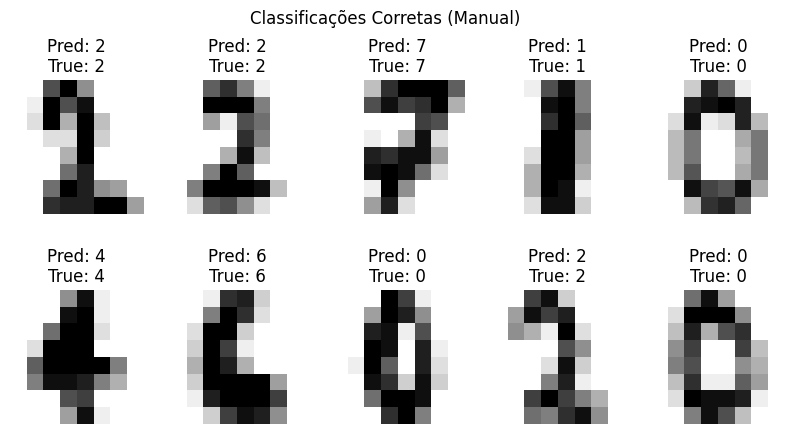

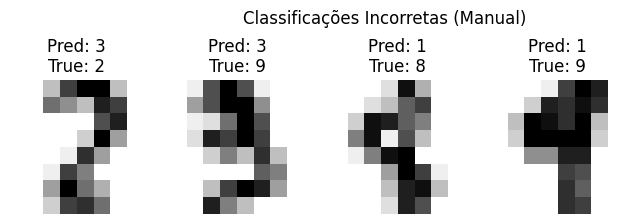

In [25]:
import matplotlib.pyplot as plt

# Identificar índices das previsões corretas e incorretas
correct_indices = np.where(predictions == y_test)[0]
incorrect_indices = np.where(predictions != y_test)[0]

# Função para exibir amostras
def display_samples(indices, X, y, predictions, title):
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices[:10]):  # Mostrar apenas os primeiros 10 exemplos
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[index].reshape(8, 8), cmap=plt.cm.gray_r)
        plt.title(f"Pred: {predictions[index]}\nTrue: {y[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Exibir algumas previsões corretas e incorretas
display_samples(correct_indices, X_test, y_test, predictions, "Classificações Corretas (Manual)")
display_samples(incorrect_indices, X_test, y_test, predictions, "Classificações Incorretas (Manual)")


### Implementação da Versão 2 do classificador
Utilize a função train_test_split() da bibioteca Scikit-Learn para separar os dados em treino e teste e o classificador k-NN da própria biblioteca para identificação dos dígitos. Ao final, exiba a classificação e o tempo de execução.

##Mesma divisão, porém agora usando a biblioteca Scikit-Learn

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

##Implementação do classificador k-NN da própria biblioteca para identificação dos dígitos.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Criação e treinamento do classificador k-NN
k = 3  #Escolha de um número pequeno e ímpar
knn = KNeighborsClassifier(n_neighbors=k)

# Medição do tempo
start_time = time.time()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"Tempo de execução: {execution_time:.4f} segundos")


Acurácia: 98.33%
Tempo de execução: 0.1837 segundos


##Exibição de algumas classificações corretas e incorretas do classificador KNN próprio da biblioteca

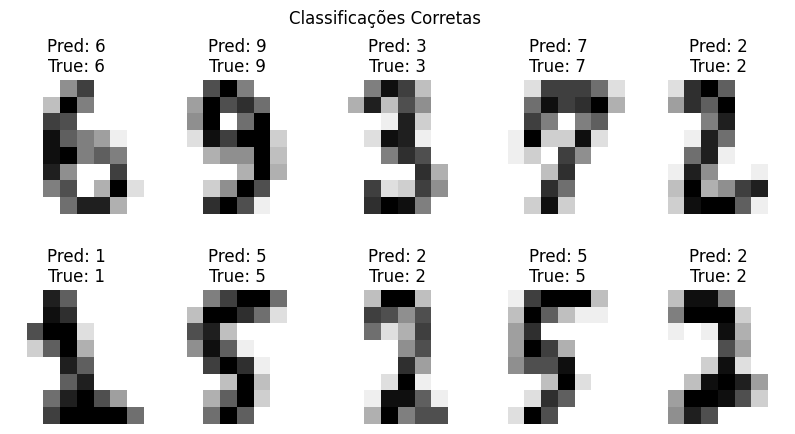

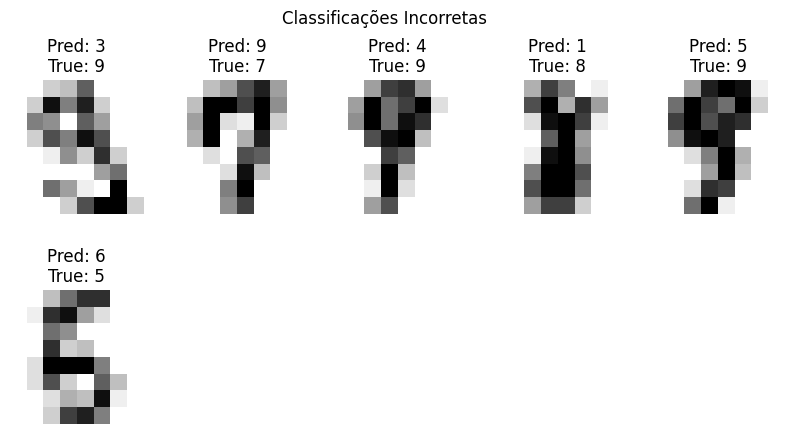

In [15]:
import matplotlib.pyplot as plt

# Identificar índices das previsões corretas
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Exibir algumas previsões corretas
def display_samples(indices, X, y, predictions, title):
    plt.figure(figsize=(10, 5))
    for i, index in enumerate(indices[:10]):  # Mostrar apenas os primeiros 10 exemplos
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[index].reshape(8, 8), cmap=plt.cm.gray_r)
        plt.title(f"Pred: {predictions[index]}\nTrue: {y[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Mostrar amostras corretas e incorretas
display_samples(correct_indices, X_test, y_test, y_pred, "Classificações Corretas")
display_samples(incorrect_indices, X_test, y_test, y_pred, "Classificações Incorretas")
